
## Data Set Information:

The dataset includes 244 instances that regroup a data of two regions of Algeria,namely the Bejaia region located in the northeast of Algeria and the Sidi Bel-abbes region located in the northwest of Algeria.

122 instances for each region.

The period from June 2012 to September 2012.
The dataset includes 11 attribues and 1 output attribue (class)
The 244 instances have been classified into â€˜fireâ€™ (138 classes) and â€˜not fireâ€™ (106 classes) classes.


## Attribute Information:

1. Date : (DD/MM/YYYY) Day, month ('june' to 'september'), year (2012)
Weather data observations
2. Temp : temperature noon (temperature max) in Celsius degrees: 22 to 42
3. RH : Relative Humidity in %: 21 to 90
4. Ws :Wind speed in km/h: 6 to 29
5. Rain: total day in mm: 0 to 16.8
FWI Components
6. Fine Fuel Moisture Code (FFMC) index from the FWI system: 28.6 to 92.5
7. Duff Moisture Code (DMC) index from the FWI system: 1.1 to 65.9
8. Drought Code (DC) index from the FWI system: 7 to 220.4
9. Initial Spread Index (ISI) index from the FWI system: 0 to 18.5
10. Buildup Index (BUI) index from the FWI system: 1.1 to 68
11. Fire Weather Index (FWI) Index: 0 to 31.1
12. Classes: two classes, namely â€œFireâ€ and â€œnot Fireâ€



## 1. importing the required libraries
importing Pandas,Numpy,Matplotlib,Seaborn and Warnings Library

In [71]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from warnings import filterwarnings
filterwarnings("ignore")

## 2. loading the dataset to pandas dataframe and setting the header to 1

In [8]:
df=pd.read_csv('C:\\Users\\Anulipsa pc\\data\\Algerian_forest_fires_dataset.csv',header=1)

In [9]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire


## 3. Data Cleaning

Removing unnecessary Rows from Dataset

In [10]:
df.drop(index=[122,123],inplace=True)
df.reset_index(inplace=True)
df.drop('index',axis=1,inplace=True)

Adding New Feature, named 'Region'in a Dataset

In [13]:
## Adding New Feature,named 'Region' in a dataset
df.loc[:122,'region']='bejaia'
df.loc[122:,'region']='Sidi-Bel Abbes'

stripping the names of the columns

In [15]:
df.columns=[i.strip() for i in df.columns]
df.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'region'],
      dtype='object')

stripping the classes features data

In [18]:
df.Classes=df.Classes.str.strip()
df['Classes'].unique()

array(['not fire', 'fire', nan], dtype=object)

In [19]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,region
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,bejaia
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire,bejaia
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,bejaia
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire,bejaia
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire,bejaia


## Changing The Data Types of the columns

In [25]:
## changing the data types of the column
df['day']=df['day'].astype(int)
df['month']=df['month'].astype(int)
df['year']=df['year'].astype(int)
df['Temperature']=df['day'].astype(int)
df['RH']=df['RH'].astype(int)
df['Rain']=df['Rain'].astype(float)
df['FFMC']=df['FFMC'].astype(float)
df['DMC']=df['DMC'].astype(float)
df['BUI']=df['BUI'].astype(float)
df['ISI']=df['ISI'].astype(float)
df['Ws']=df['Ws'].astype(float)


df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          244 non-null    int32  
 1   month        244 non-null    int32  
 2   year         244 non-null    int32  
 3   Temperature  244 non-null    int32  
 4   RH           244 non-null    int32  
 5   Ws           244 non-null    float64
 6   Rain         244 non-null    float64
 7   FFMC         244 non-null    float64
 8   DMC          244 non-null    float64
 9   DC           244 non-null    object 
 10  ISI          244 non-null    float64
 11  BUI          244 non-null    float64
 12  FWI          244 non-null    object 
 13  Classes      243 non-null    object 
 14  region       244 non-null    object 
dtypes: float64(6), int32(5), object(4)
memory usage: 24.0+ KB


Adding  Nnew  feature , named  'Data'  by  Replacing  Unnecessary  feature  like  'day' , 'month' , 'year'

In [27]:
##Adding Nnew feature , named 'Data' by Replacing Unnecessary feature like 'day' , 'month' , 'year'

df['date']=pd.to_datetime(df[['day','month','year']])
df.drop(['day','month','year'],axis=1,inplace=True)

In [28]:
## showing updated dataset after modification done
df

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,region,date
0,1,57,18.0,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,bejaia,2012-06-01
1,2,61,13.0,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,bejaia,2012-06-02
2,3,82,22.0,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,bejaia,2012-06-03
3,4,89,13.0,2.5,28.6,1.3,6.9,0.0,1.7,0,not fire,bejaia,2012-06-04
4,5,77,16.0,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,bejaia,2012-06-05
...,...,...,...,...,...,...,...,...,...,...,...,...,...
239,26,65,14.0,0.0,85.4,16.0,44.5,4.5,16.9,6.5,fire,Sidi-Bel Abbes,2012-09-26
240,27,87,15.0,4.4,41.1,6.5,8,0.1,6.2,0,not fire,Sidi-Bel Abbes,2012-09-27
241,28,87,29.0,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire,Sidi-Bel Abbes,2012-09-28
242,29,54,18.0,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire,Sidi-Bel Abbes,2012-09-29


## 4. Exploring Data
## 4.1) profiling of the data
shape of the data

In [30]:
df.shape ## in this data set there are 13 columns and 244 rows

(244, 13)

columns of the dataset

In [31]:
df.columns

Index(['Temperature', 'RH', 'Ws', 'Rain', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI',
       'FWI', 'Classes', 'region', 'date'],
      dtype='object')

 check missing values in Dataset

In [32]:
df.isnull().sum()

Temperature    0
RH             0
Ws             0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        1
region         0
date           0
dtype: int64

In [33]:
## unique value of classes feature
df['Classes'].unique()

array(['not fire', 'fire', nan], dtype=object)

Handling Categorical Feature Classes

In [36]:
df['Classes']=df['Classes'].map({'not fire':0,'fire':1})

In [37]:
df.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,region,date
0,1,57,18.0,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0.0,bejaia,2012-06-01
1,2,61,13.0,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0.0,bejaia,2012-06-02
2,3,82,22.0,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0.0,bejaia,2012-06-03
3,4,89,13.0,2.5,28.6,1.3,6.9,0.0,1.7,0,0.0,bejaia,2012-06-04
4,5,77,16.0,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0.0,bejaia,2012-06-05


Focus on Replacing Null Value

In [38]:
df['Classes'].mode()[0]

1.0

In [39]:
df['Classes']=df['Classes'].fillna(df['Classes'].mode()[0])

In [40]:
df.isnull().sum()

Temperature    0
RH             0
Ws             0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        0
region         0
date           0
dtype: int64

## Now we have zero null value in dataset

In [41]:
df['Classes'].unique()

array([0., 1.])

## check datatype in dataset

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Temperature  244 non-null    int32         
 1   RH           244 non-null    int32         
 2   Ws           244 non-null    float64       
 3   Rain         244 non-null    float64       
 4   FFMC         244 non-null    float64       
 5   DMC          244 non-null    float64       
 6   DC           244 non-null    object        
 7   ISI          244 non-null    float64       
 8   BUI          244 non-null    float64       
 9   FWI          244 non-null    object        
 10  Classes      244 non-null    float64       
 11  region       244 non-null    object        
 12  date         244 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(7), int32(2), object(3)
memory usage: 23.0+ KB


    .There is total 244 rows and 13 columns.
    . There are No null Value in dataset
    . There is total 4 data types float64,int64,object and datetime64.
    . Dtypes included float64=7 columns,int64=2 coluns,object=3 columns and datetime64=1
    . Total memory usage is 23.0+KB

checking the usage of the memory by the dataset

In [45]:
df.memory_usage()

Index           128
Temperature     976
RH              976
Ws             1952
Rain           1952
FFMC           1952
DMC            1952
DC             1952
ISI            1952
BUI            1952
FWI            1952
Classes        1952
region         1952
date           1952
dtype: int64

## 4.1.1) Numerical and Categorical Columns

## Numerical Dataset

In [48]:
# 1. Getting Numerical features from dataset
# 2. Creating Numerical Dataframe
numerical_features=[feature for feature in df.columns if df[feature].dtype !='O']

# Print Numerical feature
print('We have {} numerical features : {}'.format(len(numerical_features),numerical_features))

We have 10 numerical features : ['Temperature', 'RH', 'Ws', 'Rain', 'FFMC', 'DMC', 'ISI', 'BUI', 'Classes', 'date']


## Categorical dataset

In [49]:
# 1. Ggetting Categorical features from dataset
# 2. Creating Categorical dataframe

categorical_features = [feature for feature in df.columns if df[feature].dtype =='O']

# print columns
print('\n we have {} categorical features : {}'.format(len(categorical_features),categorical_features))


 we have 3 categorical features : ['DC', 'FWI', 'region']


## 4.1.2) Feature information

In [50]:
df.head(2)

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,region,date
0,1,57,18.0,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0.0,bejaia,2012-06-01
1,2,61,13.0,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0.0,bejaia,2012-06-02


Weather data observation :-
1. Temperature : temperature noon(temperature max) in celsius degrees: 22 to 42
2. RH : Relative Hhumidity in % : 21 to 90
3.Ws: Wind speed in km/h : 6 to 29
4.Rain:total day in mm :0 to 16.8

FWI Components

1. (FFMC) Fine Fuel Moisture Code index from FWI system:28.6 to 92.5
2. (DMC)Duff Moisture Code index from the FWI system : 1.1 to 65.9
3. (DC) Drought Code index from the FWI system : 7 to 220.4
4. (ISI) Initial Spread index from the FWI system : 0 to 18.5
5. (BUI) Buildup index from the FWI system : 1.1 to 68
6. (FWI) Fire Weather index 0 to 31.1
7. Classes: two classes ,namely Fire and not fire
8. Region : Two Regions, namely Bejaia Region indicated with O and Sidi Bbel-Abbes Region indicated with 1

## univariate Analysis 

The term univariate analysis refers to the analysis of one variable prefix "uni" means "One".The purpuse of univariate analysis is to understand the distribution of values of a single variable.

In [52]:
df.var()

Temperature     77.881670
RH             221.539415
Ws               7.897102
Rain             3.997623
FFMC           205.565939
DMC            152.968382
ISI             17.433281
BUI            201.777024
Classes          0.246711
dtype: float64

## Numerical Feature Analysis 

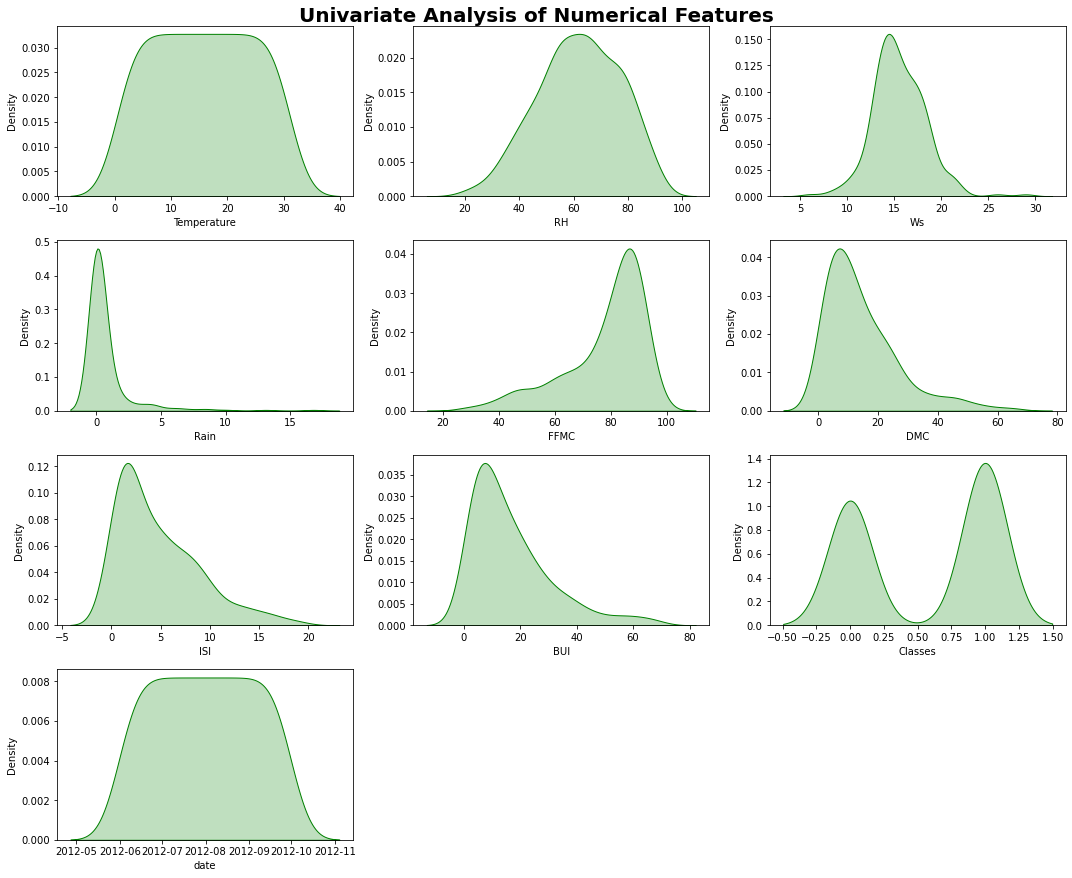

In [59]:
plt.figure(figsize=(15,15))
plt.suptitle("Univariate Analysis of Numerical Features" , fontsize=20, fontweight='bold')

for i in range(0,len(numerical_features)):
    plt.subplot(5, 3 ,i+1)
    sns.kdeplot(x=df[numerical_features[i]],shade=True,color='g')
    plt.xlabel(numerical_features[i])
    plt.tight_layout()

## Observations :
1. Rain,ISI,BUI,DMC are right skewed and positively skewed.
2. FFMC is a left skewed and Negetively skewed.
3. Outliers in Rrain,ISI,BUI,DMC and FFMC.

## scatter plot to see the trends in each numerical column

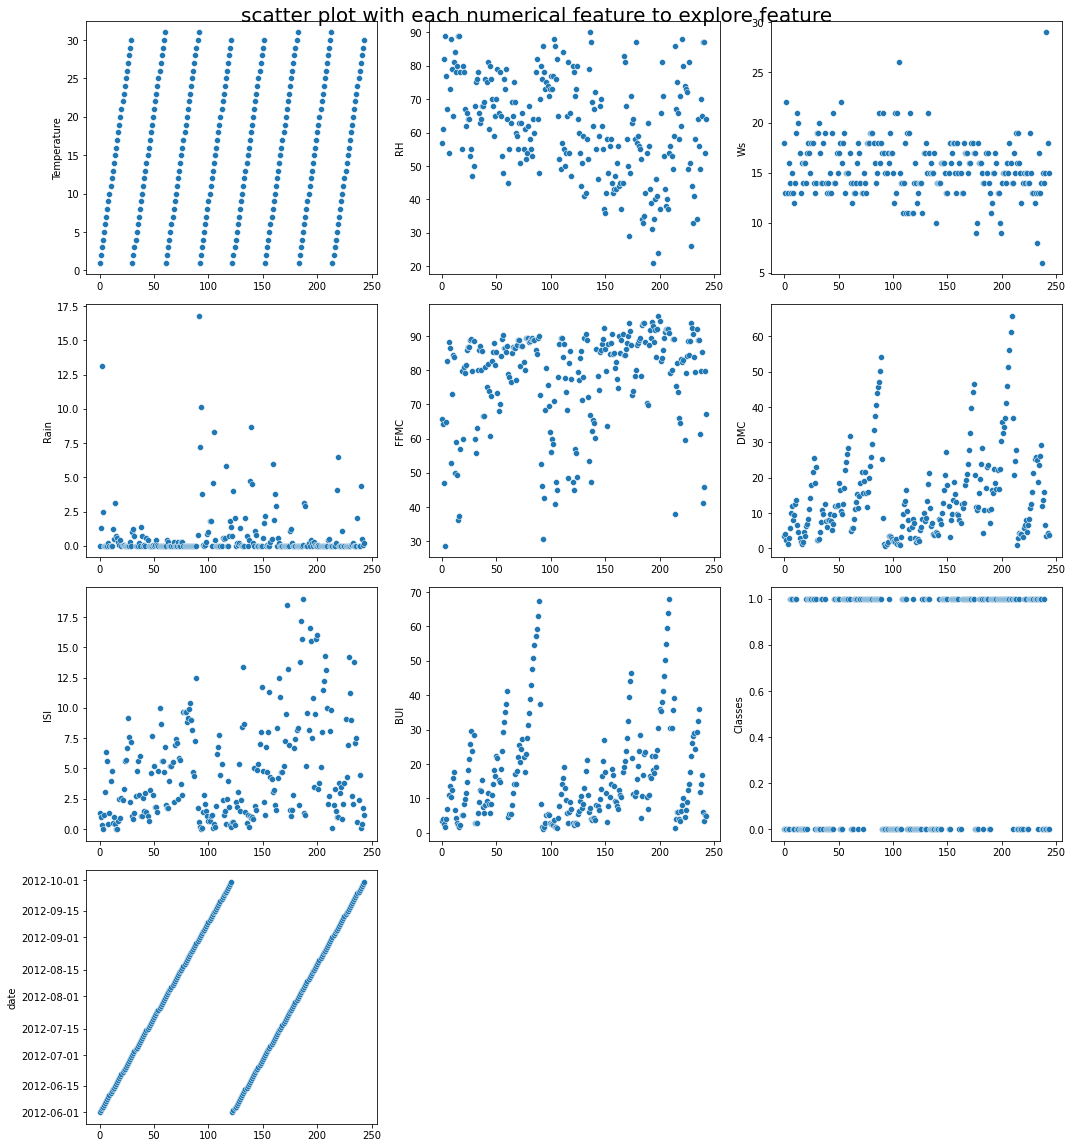

In [61]:
plt.figure(figsize=(15,20))
plt.suptitle("scatter plot with each numerical feature to explore feature",fontsize=20)

for i in range(0, len(numerical_features)):
    plt.subplot(5,3,i+1)
    sns.scatterplot(y=numerical_features[i], x=df.index,data=df)
    plt.tight_layout()

## Categorical Feature Analysis

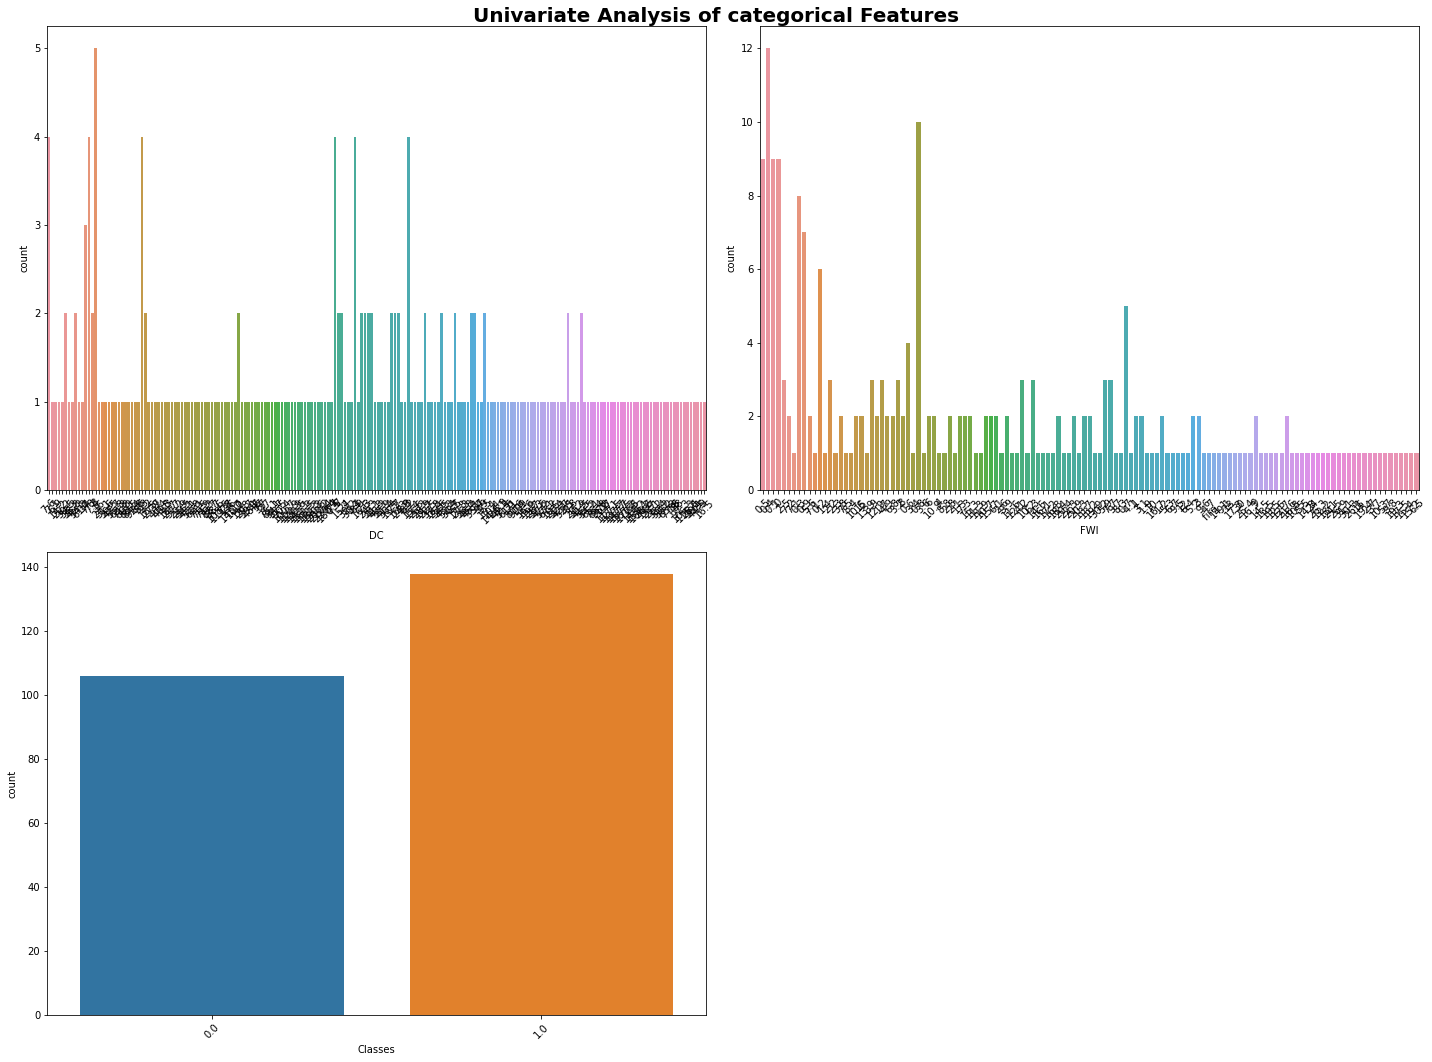

In [62]:
plt.figure(figsize=(20,15))
plt.suptitle("Univariate Analysis of categorical Features",fontsize=20,fontweight='bold')
cat1=['DC','FWI','Classes']
for i in range(0,len(cat1)):
    plt.subplot(2,2,i+1)
    sns.countplot(x=df[cat1[i]])
    plt.xlabel(cat1[i])
    plt.xticks(rotation=45)
    plt.tight_layout()
                   

## Observation:
1. Extreme value of Temperature is above 40
2. Most of the time RH is abobe 30
3. WS values lie between 10 to 20

## Bivariate analysis and multivariate analysis

In [64]:
# stripplot (categorical vs numerical)
# scatterplot / pairplot(numerical vs numerical) (check correlation)
# box plot(outlier)
# heatmap(correlation)
# lineplot(trend in numerical feature with time)

## Multicolleniarity in numerical features

In [65]:
df.corr()

,Temperature,RH,Ws,Rain,FFMC,DMC,ISI,BUI,Classes
Temperature,1.000000,-0.074209,0.047001,-0.112265,0.224032,0.491571,0.177727,0.517229,0.201784
RH,-0.074209,1.000000,0.236084,0.222968,-0.645658,-0.405133,-0.690637,-0.348587,-0.435023
Ws,0.047001,0.236084,1.000000,0.170169,-0.163255,-0.001246,0.015248,0.029756,-0.066529
Rain,-0.112265,0.222968,0.170169,1.000000,-0.544045,-0.288548,-0.347105,-0.299171,-0.379449
FFMC,0.224032,-0.645658,-0.163255,-0.544045,1.000000,0.602391,0.739730,0.589652,0.770114
DMC,0.491571,-0.405133,-0.001246,-0.288548,0.602391,1.000000,0.674499,0.982073,0.584188
ISI,0.177727,-0.690637,0.015248,-0.347105,0.739730,0.674499,1.000000,0.635891,0.735511
BUI,0.517229,-0.348587,0.029756,-0.299171,0.589652,0.982073,0.635891,1.000000,0.583882
Classes,0.201784,-0.435023,-0.066529,-0.379449,0.770114,0.584188,0.735511,0.583882,1.000000


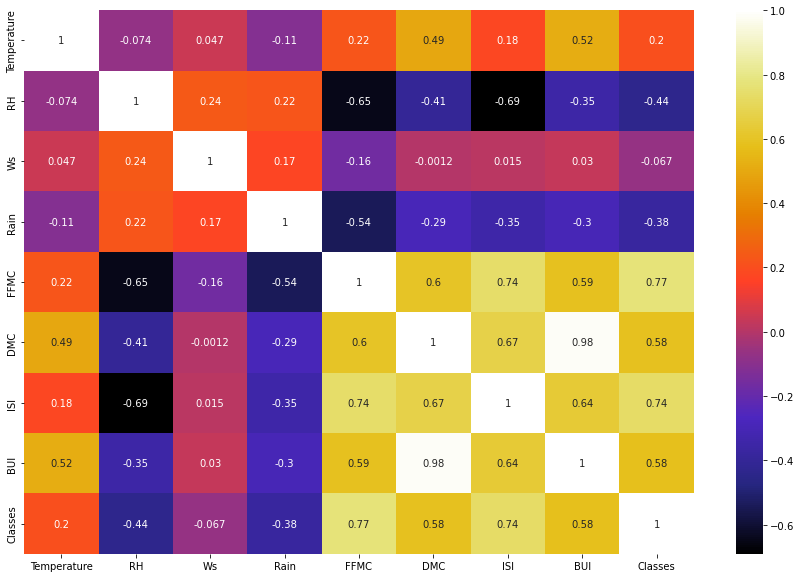

In [66]:
## plotting Heatmap

plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),cmap="CMRmap",annot=True)
plt.show()

observations
1. Highly +ve correlated features are DMC and BUI
2. Highly -ve correlated features are RH and Temp, RH and FFMC ,RH and ISI

strip plot to see the relationship between numerical features and target

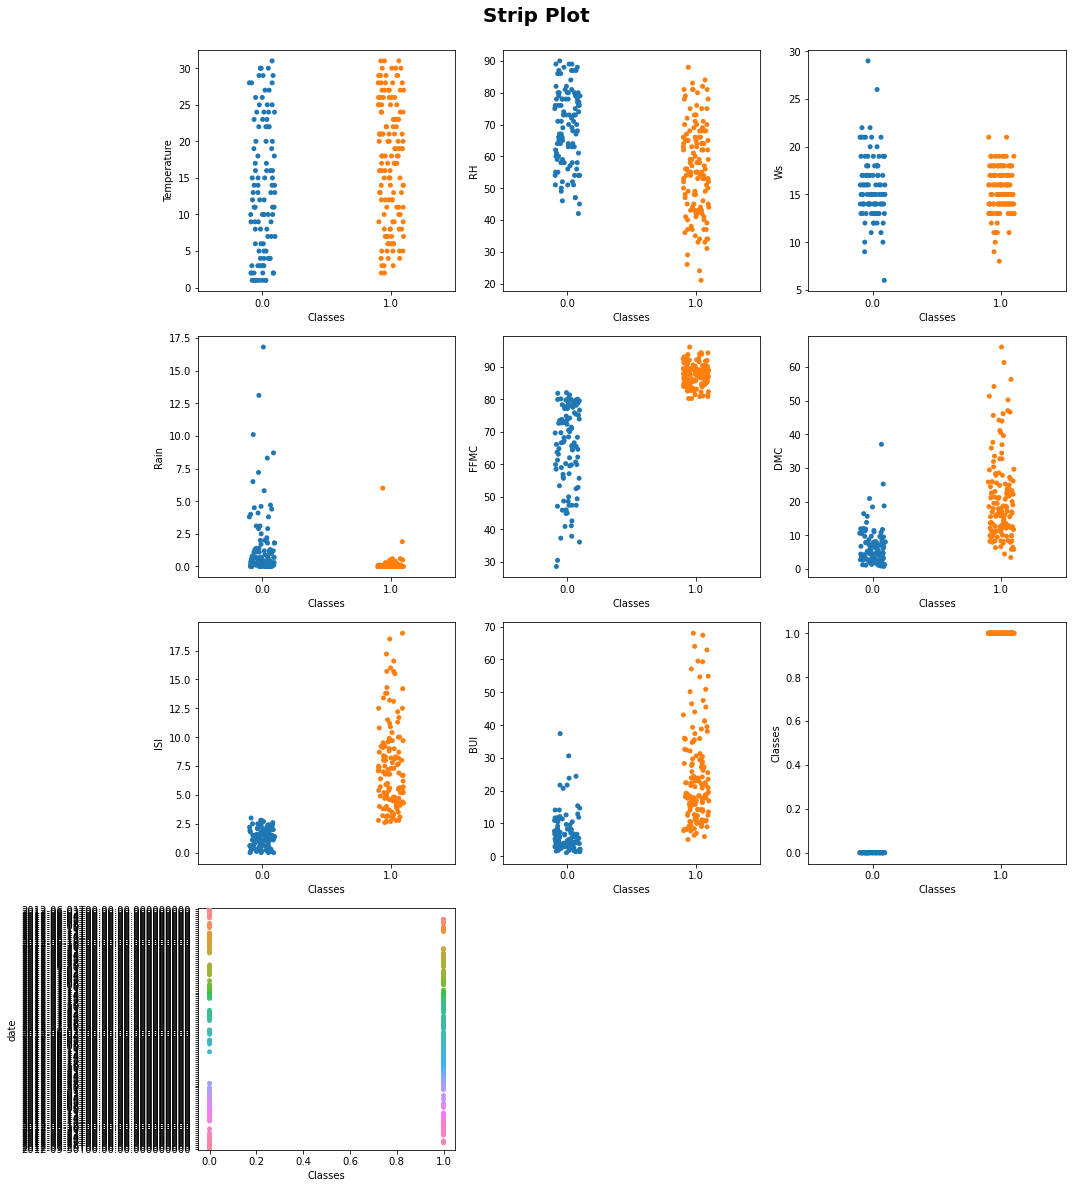

In [67]:
plt.figure(figsize=(15,20))
plt.suptitle('Strip Plot',fontsize=20, fontweight='bold',alpha=1,y=1)

for i in range(0,len(numerical_features)):
    plt.subplot(5,3,i+1)
    sns.stripplot(y=numerical_features[i], x='Classes', data=df)
    plt.tight_layout()

Obsevation

note:- 1.  Here 0 ='not fire' and 1='Fire'

       2.  places with higher temperature has fire
       3.  places with lower RH has fire
       4.  places with FFMC>80 has fire
       5.  places with ISI>2.5  has fire
       6.  places with Rain<2 has fire

Boxplot to find outliers in the features

<AxesSubplot:>

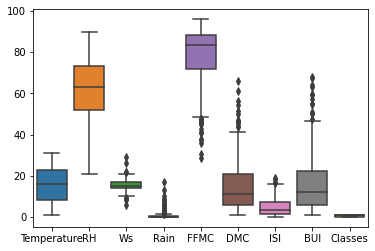

In [68]:
sns.boxplot(data=df,orient="v")

Observations:-

    RH,Rain,FFMC,DMC BUI has many outliers

## 4.2) Statistical Analysis

In [69]:
## display summary statistics for a data frame
df.describe()

,Temperature,RH,Ws,Rain,FFMC,DMC,ISI,BUI,Classes
count,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000
mean,15.754098,61.938525,15.504098,0.760656,77.887705,14.673361,4.774180,16.664754,0.565574
std,8.825059,14.884200,2.810178,1.999406,14.337571,12.368039,4.175318,14.204824,0.496700
min,1.000000,21.000000,6.000000,0.000000,28.600000,0.700000,0.000000,1.100000,0.000000
25%,8.000000,52.000000,14.000000,0.000000,72.075000,5.800000,1.400000,6.000000,0.000000
50%,16.000000,63.000000,15.000000,0.000000,83.500000,11.300000,3.500000,12.250000,1.000000
75%,23.000000,73.250000,17.000000,0.500000,88.300000,20.750000,7.300000,22.525000,1.000000
max,31.000000,90.000000,29.000000,16.800000,96.000000,65.900000,19.000000,68.000000,1.000000


Observation:-

    *  df.describe() return all statistics summary of Numeric Columns.
    *  Its Returns function like:-count(), std(), min(),25%(),50%(),75%(),max().

## 4.3) Graphical Analysis

## Which area has most of the time fire happen ?

<AxesSubplot:xlabel='region', ylabel='Classes'>

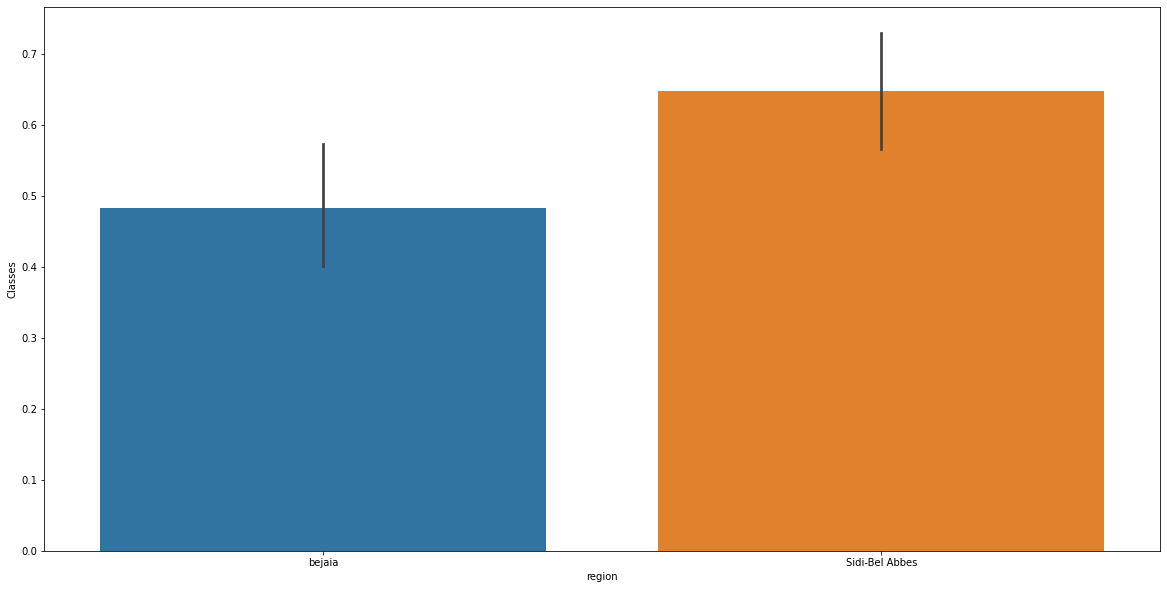

In [73]:
import matplotlib
matplotlib.rcParams['figure.figsize']=(20,10)

sns.barplot(x="region",y="Classes",data=df)

Observation:-

    Sidi-Bel-Abbes Region has Most of the Time Fire Took Placed

## Temperature Range which is in most of the places ?

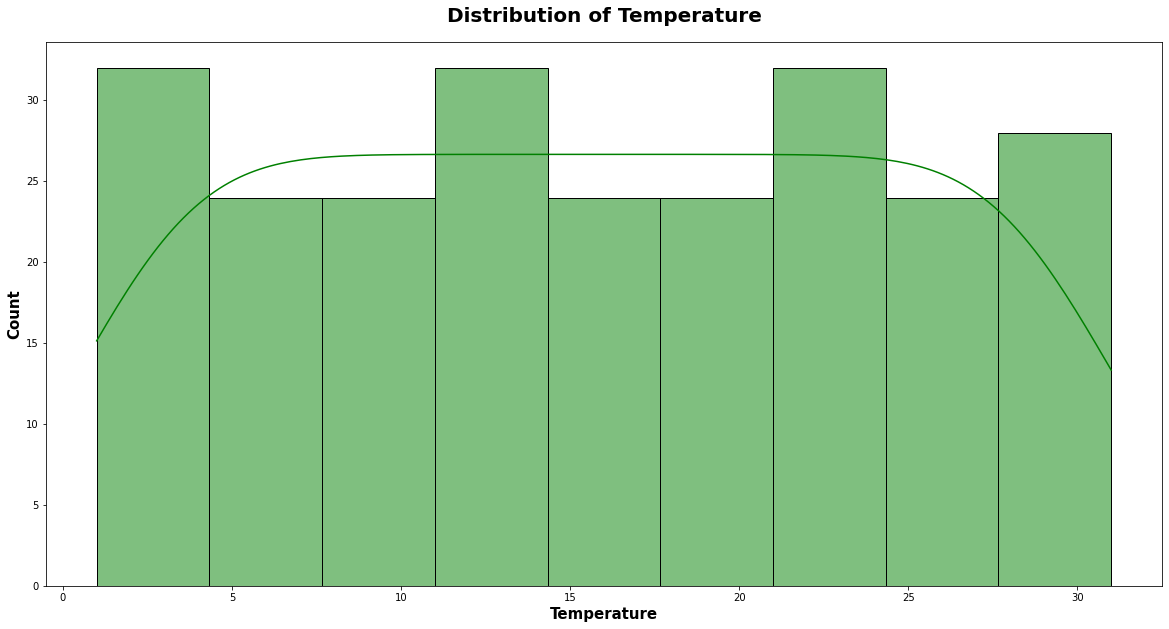

In [75]:
plt.subplots(figsize=(20,10))
sns.histplot("Distribution of Temperature",x=df.Temperature,color='g',kde=True)
plt.title("Distribution of Temperature",weight='bold',fontsize=20,pad=20)
plt.xlabel("Temperature",weight='bold',fontsize=15)
plt.ylabel("Count",weight='bold',fontsize=15)
plt.show()

Observation:-

    Temperature occur most of the time in range 32.5 to 35.0

## Highest Temperature attained

<AxesSubplot:xlabel='Temperature', ylabel='Classes'>

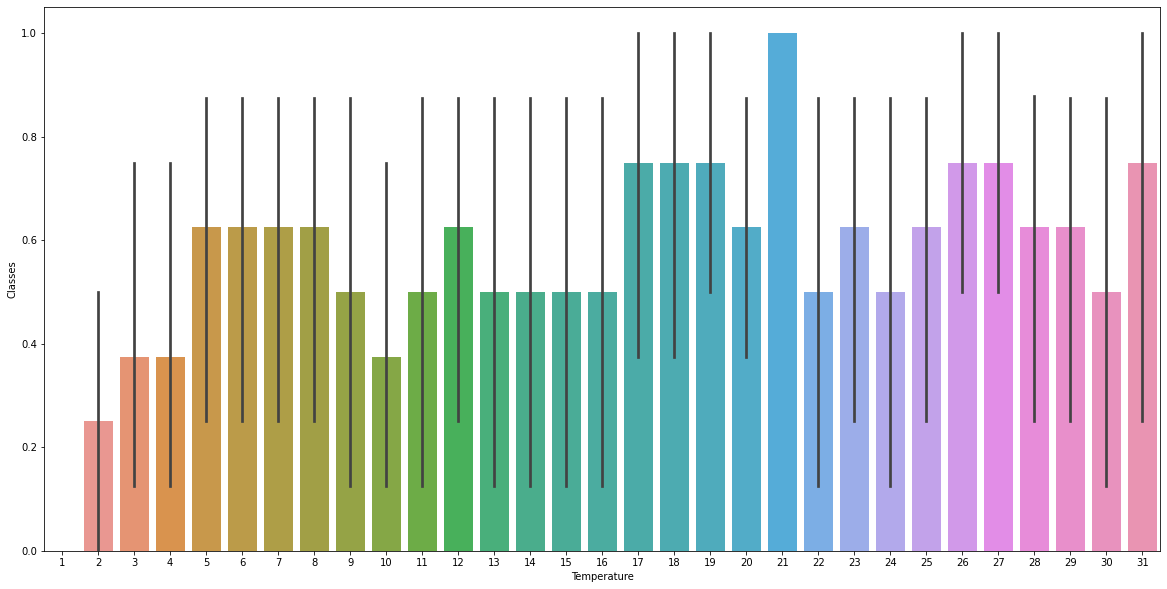

In [77]:
import matplotlib
matplotlib.rcParams['figure.figsize']=(20,10)

sns.barplot(x="Temperature",y="Classes",data=df)

Observation:-
    
    Highest temperature is 42,40,37

## Which region has most time rain happens

<AxesSubplot:xlabel='region', ylabel='Rain'>

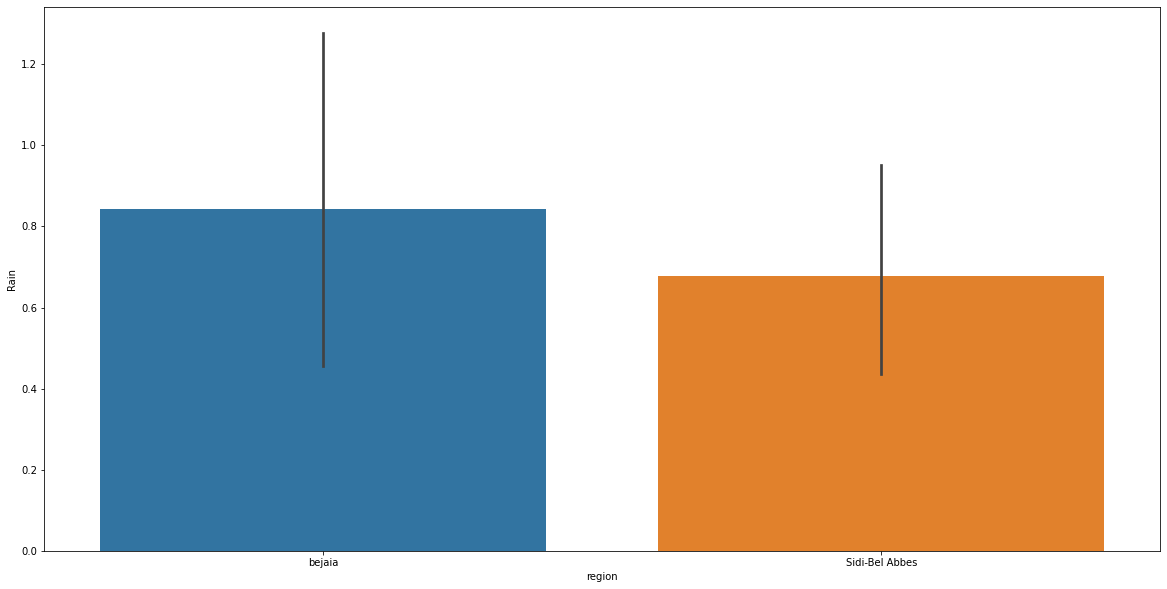

In [79]:
import matplotlib
matplotlib.rcParams['figure.figsize']=(20,10)
sns.barplot(x="region",y="Rain",data=df)

Observation:-

    Bejaia is the region in which most of the time rain happens

## Boxplot to find Outliers in the features

<AxesSubplot:>

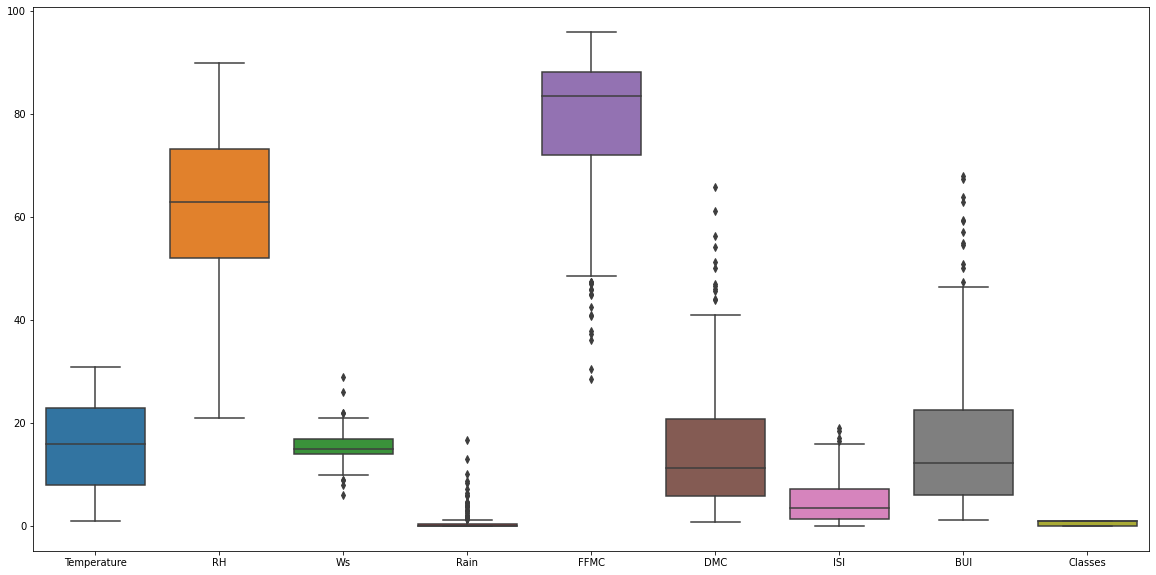

In [80]:
sns.boxplot(data=df,orient="v")

Observations:-
    
    RH,RAIN,FFMC,DMC BUI has many outliers

## Boxplot of Class Vs Temperature

<AxesSubplot:xlabel='Classes', ylabel='Temperature'>

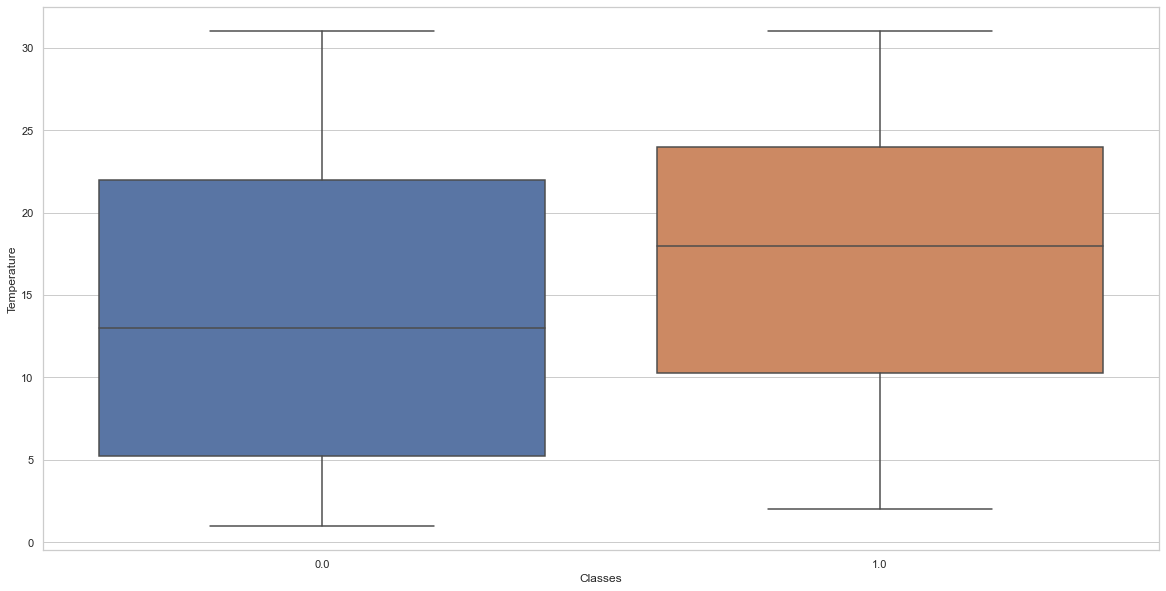

In [81]:
## python program to illustrate
## boxplot using inbuilt data-set
## given in seaborn

## importing the required module
import seaborn

## use to set style of background of plot
seaborn.set(style="whitegrid")

## Loading data-set
seaborn.boxplot(x='Classes',y='Temperature',data=df)

Observation:-
    
    One day at lower temperature fires occur

## Boxplot of Classes Vs Rain

<AxesSubplot:xlabel='Classes', ylabel='Rain'>

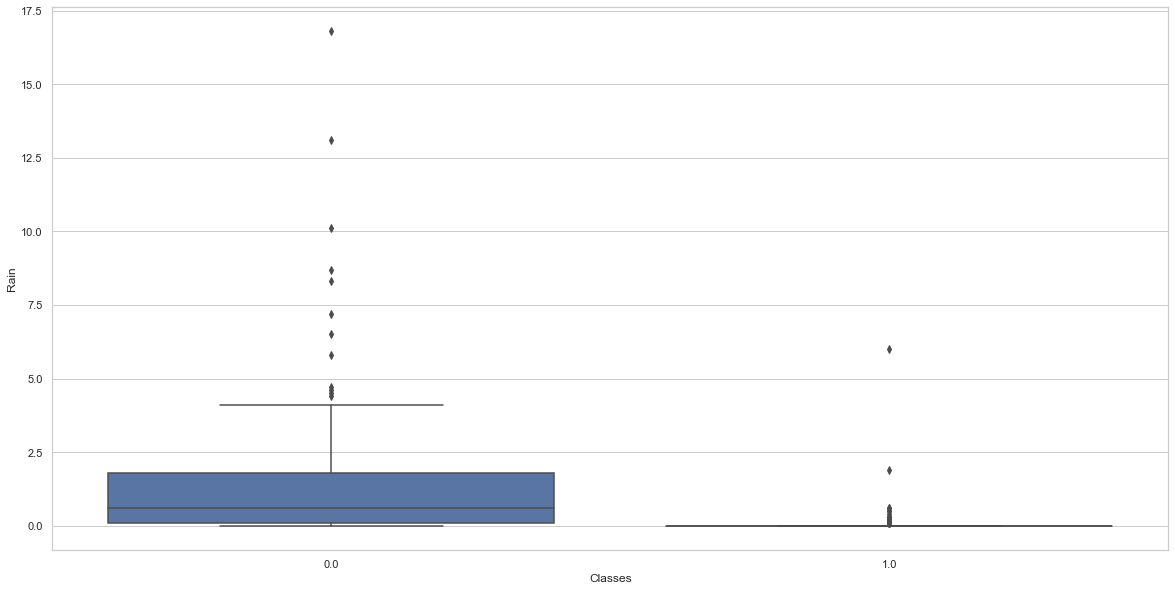

In [83]:
## Python program to illustrate
## boxplot using inbuilt data-set
## given in seaborn

## importing the required module
import seaborn

#3 use to set style of background of plot
seaborn.set(style="whitegrid")

## Loading data-set
seaborn.boxplot(x='Classes',y='Rain',data=df)

Observation:-

    In many days after having rain also fire occur.